In [1]:
1+1

2

# Import Dependancies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

## Preprocess the csv files

In [106]:
def clean_csv(filename):

    with open(f'../data/{filename}.csv', 'r') as file:
        data = file.read()

    # Split data into lines
    lines = data.split('\n')

    data_split = [line.split('\t') for line in lines if line]

    # Create DataFrame
    df = pd.DataFrame(data_split[1:], columns=data_split[0])

    df['DATETIME'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])
    df.drop(columns=['<DATE>', '<TIME>'], inplace=True)

    df.rename(columns={
        '<OPEN>': f'OPEN_{filename}',
        '<HIGH>': f'HIGH_{filename}',
        '<LOW>': f'LOW_{filename}',
        '<CLOSE>': f'CLOSE_{filename}',
        '<TICKVOL>': f'TICKVOL_{filename}',
        '<SPREAD>': f'SPREAD_{filename}'
    }, inplace=True)

    df = df[['DATETIME', f'OPEN_{filename}', f'HIGH_{filename}', f'LOW_{filename}', f'CLOSE_{filename}', f'TICKVOL_{filename}', f'SPREAD_{filename}']]

    numeric_cols = [f'OPEN_{filename}', f'HIGH_{filename}', f'LOW_{filename}', f'CLOSE_{filename}', f'TICKVOL_{filename}', f'SPREAD_{filename}']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

    df = df.set_index('DATETIME')

    return df




In [107]:
b300_1h = clean_csv('Boom_300_1h')

In [108]:
b300_1h.head()

,OPEN_Boom_300_1h,HIGH_Boom_300_1h,LOW_Boom_300_1h,CLOSE_Boom_300_1h,TICKVOL_Boom_300_1h,SPREAD_Boom_300_1h
DATETIME,,,,,,
2021-07-30 11:00:00,9839.038,9890.855,9768.512,9833.501,2836,488
2021-07-30 12:00:00,9833.370,9874.833,9744.516,9866.241,3590,487
2021-07-30 13:00:00,9866.121,9883.364,9782.826,9828.654,3588,489
2021-07-30 14:00:00,9828.497,9828.497,9703.011,9703.011,3590,485
2021-07-30 15:00:00,9702.944,9779.034,9585.119,9585.119,3590,479


In [109]:
b500_1h = clean_csv('Boom_500_1h')

In [110]:
b1000_1h = clean_csv('Boom_1000_1h')

In [111]:
c300_1h = clean_csv('Crash_300_1h')

In [112]:
c500_1h = clean_csv('Crash_500_1h')

In [113]:
c1000_1h = clean_csv('Crash_1000_1h')

In [114]:
v10_1h = clean_csv('v10_1h')

In [115]:
v10_1s_1h = clean_csv('v10_1s_1h')

In [116]:
v50_1h = clean_csv('v50_1h')

In [117]:
v50_1s_1h = clean_csv('v50_1s_1h')

In [118]:
v75_1h = clean_csv('v75_1h')

In [119]:
v75_1s_1h = clean_csv('v75_1s_1h')

In [120]:
v100_1h = clean_csv('v100_1h')

In [121]:
v100_1s_1h = clean_csv('v100_1s_1h')

In [122]:
dfs = [b300_1h, b500_1h, b1000_1h, c300_1h, c500_1h, c1000_1h, v10_1h, v10_1s_1h, v50_1h, v50_1s_1h, v75_1h, v75_1s_1h, v100_1h, v100_1s_1h]

In [123]:
# get the recent date from all dfs

for i, df in enumerate(dfs):
    _ = df.index[0]
    print(i, ' ', _)


0   2021-07-30 11:00:00
1   2019-07-12 08:00:00
2   2019-04-17 09:00:00
3   2021-07-30 11:00:00
4   2019-07-12 08:00:00
5   2019-04-17 09:00:00
6   2019-01-01 05:00:00
7   2019-09-24 10:00:00
8   2019-01-01 05:00:00
9   2020-06-03 02:00:00
10   2019-01-01 05:00:00
11   2020-06-03 02:00:00
12   2019-01-01 05:00:00
13   2019-09-24 10:00:00


### B300, C300, V50 1s and V75 1s data will be dropped

In [124]:
df_list = [b500_1h, b1000_1h, c500_1h, c1000_1h, v10_1h, v10_1s_1h, v50_1h, v75_1h, v100_1h, v100_1s_1h]

In [125]:
for i, df in enumerate(df_list):
    _ = df.index[0]
    print(i, ' ', _)

0   2019-07-12 08:00:00
1   2019-04-17 09:00:00
2   2019-07-12 08:00:00
3   2019-04-17 09:00:00
4   2019-01-01 05:00:00
5   2019-09-24 10:00:00
6   2019-01-01 05:00:00
7   2019-01-01 05:00:00
8   2019-01-01 05:00:00
9   2019-09-24 10:00:00


In [126]:
dfc = pd.concat(df_list, axis=1, join='outer')

In [127]:
dff=dfc.dropna()

In [128]:
max(dff.isna().sum())

0

In [130]:
dff.tail()

,OPEN_Boom_500_1h,HIGH_Boom_500_1h,LOW_Boom_500_1h,CLOSE_Boom_500_1h,TICKVOL_Boom_500_1h,SPREAD_Boom_500_1h,OPEN_Boom_1000_1h,HIGH_Boom_1000_1h,LOW_Boom_1000_1h,CLOSE_Boom_1000_1h,...,LOW_v100_1h,CLOSE_v100_1h,TICKVOL_v100_1h,SPREAD_v100_1h,OPEN_v100_1s_1h,HIGH_v100_1s_1h,LOW_v100_1s_1h,CLOSE_v100_1s_1h,TICKVOL_v100_1s_1h,SPREAD_v100_1s_1h
DATETIME,,,,,,,,,,,,,,,,,,,,,
2024-06-05 11:00:00,5549.968,5574.897,5545.361,5571.813,3524.0,77.0,15773.427,15783.974,15766.719,15772.150,...,1628.53,1636.56,1785,43,818.14,822.28,810.75,814.79,3488.0,23.0
2024-06-05 12:00:00,5571.791,5584.975,5562.126,5572.614,3501.0,77.0,15772.149,15786.650,15761.744,15775.728,...,1631.35,1635.00,1789,43,814.83,817.85,806.44,815.40,3498.0,23.0
2024-06-05 13:00:00,5572.613,5577.513,5560.821,5560.821,3507.0,77.0,15775.712,15777.547,15744.566,15761.985,...,1624.18,1630.75,1788,43,815.48,821.70,812.27,815.95,3501.0,23.0
2024-06-05 14:00:00,5560.794,5565.369,5551.378,5554.248,3512.0,77.0,15761.982,15761.982,15718.093,15749.478,...,1617.93,1637.47,1788,43,816.21,822.59,810.42,822.20,3507.0,23.0
2024-06-05 15:00:00,5554.247,5554.247,5545.857,5547.663,1535.0,77.0,15749.473,15749.473,15729.533,15729.533,...,1609.34,1618.07,1537,43,822.25,827.58,819.67,826.60,3109.0,23.0


In [131]:
dff.describe()

,OPEN_Boom_500_1h,HIGH_Boom_500_1h,LOW_Boom_500_1h,CLOSE_Boom_500_1h,TICKVOL_Boom_500_1h,SPREAD_Boom_500_1h,OPEN_Boom_1000_1h,HIGH_Boom_1000_1h,LOW_Boom_1000_1h,CLOSE_Boom_1000_1h,...,LOW_v100_1h,CLOSE_v100_1h,TICKVOL_v100_1h,SPREAD_v100_1h,OPEN_v100_1s_1h,HIGH_v100_1s_1h,LOW_v100_1s_1h,CLOSE_v100_1s_1h,TICKVOL_v100_1s_1h,SPREAD_v100_1s_1h
count,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,...,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000,41187.000000
mean,5940.970232,5954.667666,5927.224143,5940.852443,3504.464734,82.498701,11656.943117,11675.044447,11639.060765,11657.103547,...,5909.193410,5958.920095,1789.634909,144.739287,4969.241610,5011.023888,4927.361770,4968.988033,3564.995703,150.328914
std,2143.564952,2148.518928,2138.523954,2143.449919,56.039610,29.941596,1524.053980,1526.407415,1521.650225,1524.124200,...,5931.308291,5981.122958,24.339945,130.919409,4297.882214,4333.968895,4261.668865,4297.815966,54.426227,177.427750
min,3171.941000,3180.880000,3168.034000,3171.943000,598.000000,44.000000,8746.397000,8762.992000,8718.229000,8746.416000,...,977.070000,983.610000,304.000000,30.000000,546.590000,553.150000,542.250000,546.670000,611.000000,12.000000
25%,4348.665500,4358.409000,4337.778000,4348.671000,3484.000000,60.000000,10453.091500,10470.399500,10437.540500,10453.178500,...,1852.615000,1868.455000,1785.000000,57.000000,1605.835000,1619.375000,1593.355000,1605.965000,3551.000000,40.000000
50%,5010.864000,5021.477000,4998.865000,5010.864000,3504.000000,69.000000,11186.948000,11206.227000,11173.161000,11186.965000,...,3384.390000,3411.360000,1792.000000,95.000000,3450.970000,3480.540000,3421.120000,3450.840000,3577.000000,80.000000
75%,7329.505000,7347.146000,7315.138000,7329.238000,3532.000000,102.000000,12829.828500,12850.614000,12811.064500,12829.959500,...,7775.210000,7844.105000,1797.000000,180.000000,7647.415000,7709.670000,7581.830000,7646.750000,3589.000000,190.000000
max,11079.478000,11092.339000,11057.640000,11079.498000,3573.000000,154.000000,16765.430000,16768.566000,16716.056000,16765.447000,...,35068.780000,35254.190000,1822.000000,600.000000,24982.560000,25094.780000,24637.960000,24980.010000,3620.000000,900.000000


In [132]:
dff.to_csv('../clean_data/cleaned_data.csv', index=True)

### Predicting the 3rd hours's close price

In [ ]:
dff['b500_pred'] = dff['CLOSE_Boom_500_1h'].shift(-2)
dff['b1000_pred'] = dff['CLOSE_Boom_1000_1h'].shift(-2)
dff['c500_pred'] = dff['CLOSE_Crash_500_1h'].shift(-2)
dff['c1000_pred'] = dff['CLOSE_Crash_1000_1h'].shift(-2)

In [139]:
dff = dff.dropna()

In [154]:
corr = dff.corr()

In [155]:
corr

,OPEN_Boom_500_1h,HIGH_Boom_500_1h,LOW_Boom_500_1h,CLOSE_Boom_500_1h,TICKVOL_Boom_500_1h,SPREAD_Boom_500_1h,OPEN_Boom_1000_1h,HIGH_Boom_1000_1h,LOW_Boom_1000_1h,CLOSE_Boom_1000_1h,...,OPEN_v100_1s_1h,HIGH_v100_1s_1h,LOW_v100_1s_1h,CLOSE_v100_1s_1h,TICKVOL_v100_1s_1h,SPREAD_v100_1s_1h,b500_pred,b1000_pred,c500_pred,c1000_pred
OPEN_Boom_500_1h,1.000000,0.999977,0.999989,0.999954,0.492137,0.999942,-0.242496,-0.242417,-0.242449,-0.242412,...,0.845158,0.845197,0.845199,0.845184,0.309543,0.764312,0.999860,-0.242236,0.778972,0.798814
HIGH_Boom_500_1h,0.999977,1.000000,0.999988,0.999989,0.492196,0.999942,-0.242518,-0.242438,-0.242471,-0.242432,...,0.845134,0.845172,0.845174,0.845159,0.309592,0.764302,0.999896,-0.242257,0.778966,0.798797
LOW_Boom_500_1h,0.999989,0.999988,1.000000,0.999977,0.492099,0.999953,-0.242501,-0.242421,-0.242453,-0.242415,...,0.845150,0.845188,0.845190,0.845175,0.309493,0.764317,0.999884,-0.242241,0.778969,0.798804
CLOSE_Boom_500_1h,0.999954,0.999989,0.999977,1.000000,0.492145,0.999930,-0.242504,-0.242424,-0.242457,-0.242418,...,0.845120,0.845159,0.845160,0.845145,0.309536,0.764297,0.999907,-0.242244,0.778940,0.798773
TICKVOL_Boom_500_1h,0.492137,0.492196,0.492099,0.492145,1.000000,0.492117,-0.044384,-0.044271,-0.044439,-0.044379,...,0.414649,0.414711,0.414637,0.414702,0.873242,0.370613,0.492215,-0.044541,0.396453,0.416848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPREAD_v100_1s_1h,0.764312,0.764302,0.764317,0.764297,0.370613,0.764278,-0.345207,-0.345186,-0.345193,-0.345193,...,0.931361,0.931307,0.931358,0.931273,0.302470,1.000000,0.764269,-0.345168,0.682332,0.651530
b500_pred,0.999860,0.999896,0.999884,0.999907,0.492215,0.999838,-0.242523,-0.242443,-0.242476,-0.242438,...,0.845048,0.845087,0.845088,0.845073,0.309652,0.764269,1.000000,-0.242262,0.778880,0.798695
b1000_pred,-0.242236,-0.242257,-0.242241,-0.242244,-0.044541,-0.242327,0.999525,0.999654,0.999595,0.999684,...,-0.338481,-0.338475,-0.338478,-0.338460,-0.075736,-0.345168,-0.242262,1.000000,-0.376405,-0.372921
c500_pred,0.778972,0.778966,0.778969,0.778940,0.396453,0.778971,-0.376293,-0.376317,-0.376283,-0.376333,...,0.781858,0.781863,0.781863,0.781831,0.360503,0.682332,0.778880,-0.376405,1.000000,0.890284


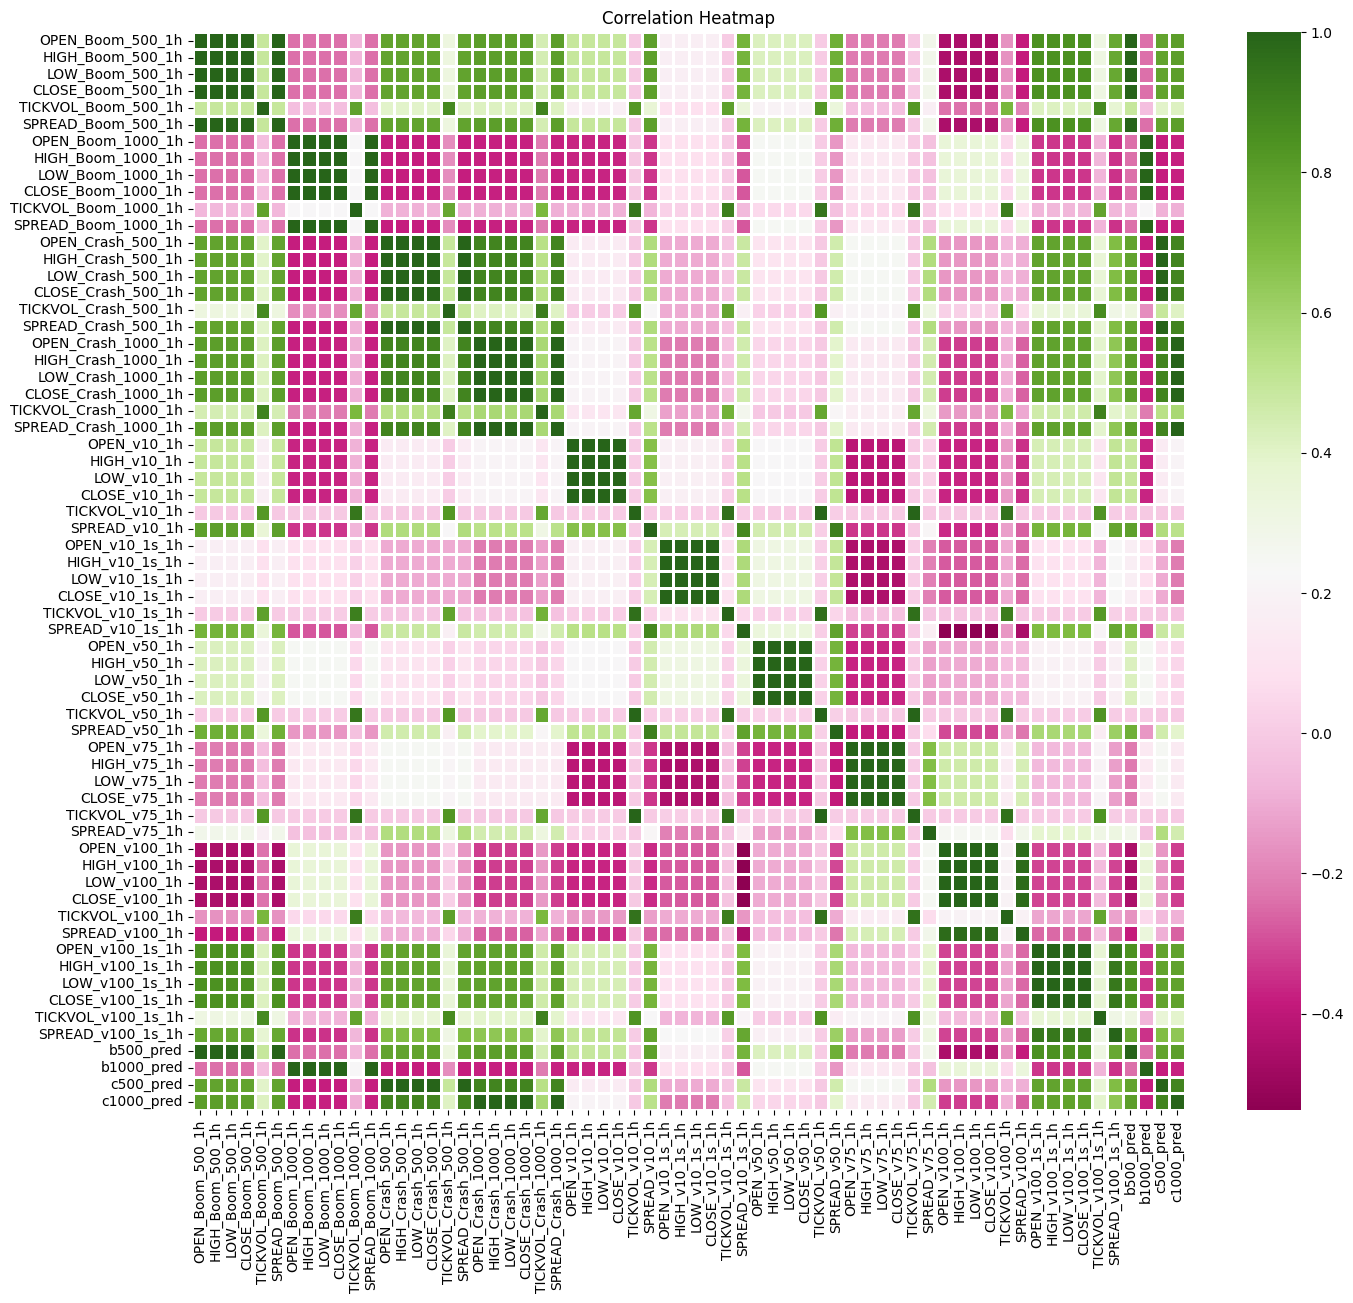

In [168]:
plt.figure(figsize=(16, 14))
sns.heatmap(corr, fmt=".2f", cmap='PiYG', linewidths=1, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [169]:
dff.to_csv('../clean_data/final.csv', index=True)